<a href="https://colab.research.google.com/github/Alifiamutiaaa/fastAPI/blob/main/150_Dataset_HeartLineLeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = '/content/drive/MyDrive/dataset/DatasetHL'

# Arsitektur LeNet-5
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(200, 640, 3)))  # Updated input_shape to (200, 640, 3)
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Preprocessing data menggunakan ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.111)

In [4]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 640, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 320, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 316, 48)       38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 158, 48)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 364032)            0         
                                                                 
 dense (Dense)               (None, 256)               9

In [5]:
# Membuat data generator untuk pelatihan
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 640),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

# Membuat data generator untuk validasi
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 640),
    batch_size=4,
    class_mode='categorical',
    subset='validation'
)

Found 135 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [6]:
# Adding Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluasi model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

Epoch 1/100
34/34 [==============================] - 12s 180ms/step - loss: 1.3386 - accuracy: 0.3630 - val_loss: 1.1208 - val_accuracy: 0.3333
Epoch 2/100
34/34 [==============================] - 2s 49ms/step - loss: 1.1273 - accuracy: 0.3333 - val_loss: 1.1321 - val_accuracy: 0.3333
Epoch 3/100
34/34 [==============================] - 2s 63ms/step - loss: 1.1096 - accuracy: 0.3333 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 4/100
34/34 [==============================] - 2s 61ms/step - loss: 1.1050 - accuracy: 0.3926 - val_loss: 1.0981 - val_accuracy: 0.4000
Epoch 5/100
34/34 [==============================] - 2s 61ms/step - loss: 1.0846 - accuracy: 0.4370 - val_loss: 1.0960 - val_accuracy: 0.3333
Epoch 6/100
34/34 [==============================] - 2s 58ms/step - loss: 1.0511 - accuracy: 0.5037 - val_loss: 1.1010 - val_accuracy: 0.4000
Epoch 7/100
34/34 [==============================] - 2s 65ms/step - loss: 0.9895 - accuracy: 0.6000 - val_loss: 1.0401 - val_accuracy: 0.6000
Epoc

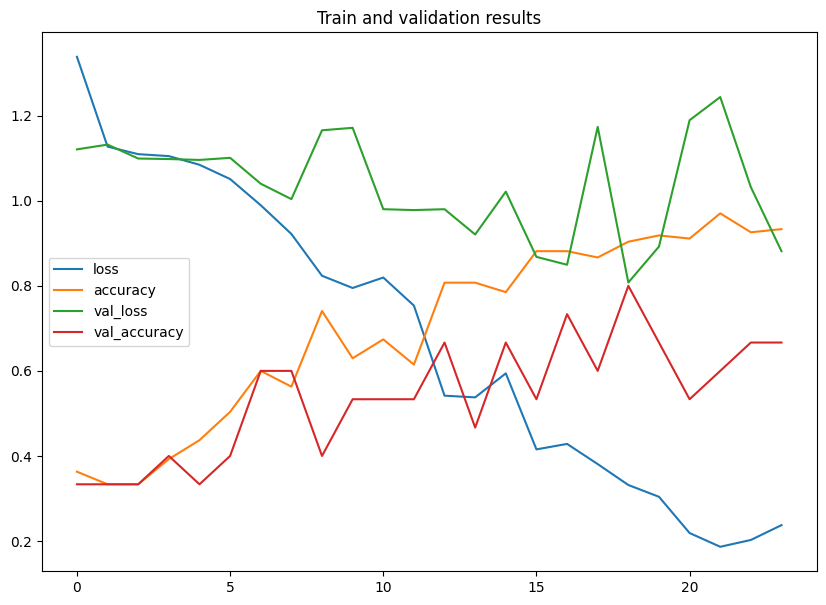

In [7]:
pd.DataFrame(history.history).plot(title="Train and validation results",figsize=(10,7));

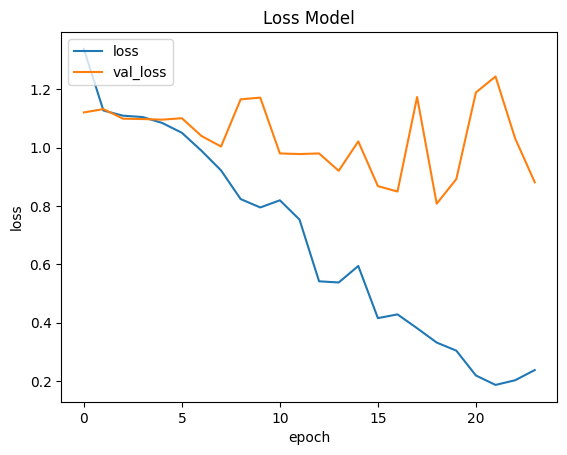

In [8]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

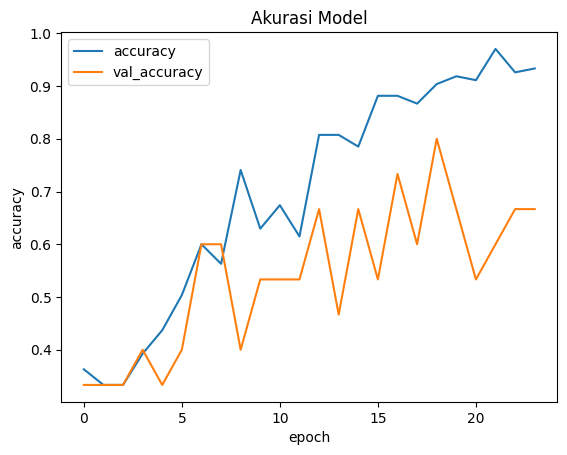

In [9]:
#plot akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

Saving Frame 1-1.jpg to Frame 1-1.jpg


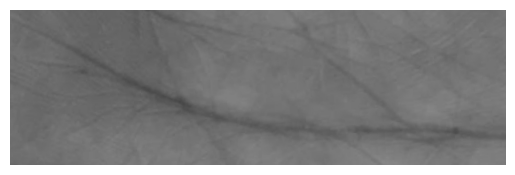

1/1 [==============================] - 0s 305ms/step
Predicted class: 001
Class probabilities: [[0.58719826 0.27920994 0.1335918 ]]


In [10]:
 from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Upload an image file
uploaded = files.upload()

for filename in uploaded.keys():
    # Load the uploaded image
    img_path = filename
    img = image.load_img(img_path, target_size=(200, 640))

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image for prediction
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Make predictions
    predictions = model.predict(img_array)

    # Get the class label with the highest probability
    predicted_class = np.argmax(predictions)

    classification = ['001', '002', '003']
    i=0
    for i in range(len(classification)):
      if predicted_class == i:
        class_name = classification[i]

    # Display the result
    print(f'Predicted class: {class_name}')
    print(f'Class probabilities: {predictions}')

